# Reading files from HDFS

In [1]:
# Install required packages
!pip3 install pandas
!pip3 install xlrd
!pip3 install pydicom
!pip install pydoop
!pip3 install matplotlib
!pip install hdfs
!pip install tqdm

You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.


#### Creating Spark session

In [2]:
# Create a SparkSession:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("read_hdfs").getOrCreate()

from pyspark import SparkFiles
import pandas as pd

In [2]:
#Reading xls files
spark.sparkContext.addFile('hdfs:///projects/incisive/datalake/colorectal/goc/data/20210910_1123/Test100921/Colorectal_Cancer.xls')

xls = pd.ExcelFile(SparkFiles.get('Colorectal_Cancer.xls'))
# Now you can list all sheets in the file
xls.sheet_names
#['General info', 'Baseline',...]


['General info',
 'Baseline',
 'Timepoints',
 'Treatment',
 'Histology - Mutations',
 'Lab Results']

In [3]:
df_colorectal=pd.read_excel(open(SparkFiles.get('Colorectal_Cancer.xls'), 'rb'))
df_colorectal

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Demographicaphics,NaN,NaN,NaN,Medical History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metadata,NaN,NaN
1,Patient Number,Gender,Age at diagnosis,Marital status,Medical History,Familial Cancer History Father,Familial Cancer History Mother,Medication,Syndromes,CEA,"CA19,9",Current state,Notes,Provider,Case,Delivery Time
2,NaN,0: male 1: female,NaN,0: single 1: married 2: divorced 3: widow,Terminology: https://icd.who.int/browse10/2010/en,0: no 1: yes,0: no 1: yes,0:no 1:yes 2:side,0:familial adenomatous polyposis syndrome (FAP...,ng/ml,U/ml,0: survival 1: relapse 2: death,NaN,"AUTH: 001, UOA: 002, HCS: 003, GOC: 004, UNS: ...",colorectal,Project Month
3,004-000001,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [4]:
df_colorectal=pd.read_excel(open(SparkFiles.get('Colorectal_Cancer.xls'), 'rb'), "Baseline")
df_colorectal

,Unnamed: 0,Baseline imaging,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Patient Number,Altered bowel habit,Iron-deficiency anemia,Bowel obstruction,Weight Loss,Other symptoms,Existence of Laboratory data,CT,MRI,PET-CT,...,Max Tumor Diameter,Lymph nodes,Lymph node stations,Lymph nodes max short axis diameter,Distant metastasis,Distant metastasis location,TNM Staging,Rectal cancer,MRF involvement,EMVI
1,NaN,0: No 1: Yes,0: No 1: Yes,0: No 1: Yes,0: No 1: Yes,NaN,0: No 1: Yes,folder name: PatientId_Modality_Timepoint,folder name: PatientId_Modality_Timepoint,folder name: PatientId_Modality_Timepoint,...,(in cm),0: No 1: Yes,0: No 1: Yes,in mm,0: No 1: Yes,1: liver 2: lung 3:ovary 4: non-regional node,NaN,Perirectal stranding 0:No 1:Yes,0:No 1:Yes,0:No 1:Yes
2,004-000001,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:

spark.sparkContext.addFile('hdfs:///user/govern/demographics.txt')  
demographics_pdf = pd.read_csv(open(SparkFiles.get('demographics.txt'), 'rb'), sep="\t")
demographics_pdf.head

<bound method NDFrame.head of          block_group  median_income  median_age
0        20130001001        53125.0        43.4
1        20130001002        63917.0        45.3
2        20130001003        60227.0        36.0
3        20160001001        57500.0        39.6
4        20160002001        88750.0        36.7
...              ...            ...         ...
220328  560459511001        65729.0        46.8
220329  560459511002        77132.0        42.7
220330  560459513001        35625.0        33.7
220331  560459513002        42317.0        54.9
220332  560459513003        51726.0        31.8

[220333 rows x 3 columns]>

In [6]:
demographics = spark \
  .read \
  .csv("/user/govern/demographics", sep="\t", header=True, inferSchema=True) \
#demographics_pdf = demographics.toPandas()
demographics.printSchema()
demographics.show()

root
 |-- block_group: long (nullable = true)
 |-- median_income: integer (nullable = true)
 |-- median_age: double (nullable = true)

+-----------+-------------+----------+
|block_group|median_income|median_age|
+-----------+-------------+----------+
|20130001001|        53125|      43.4|
|20130001002|        63917|      45.3|
|20130001003|        60227|      36.0|
|20160001001|        57500|      39.6|
|20160002001|        88750|      36.7|
|20160002002|        92813|      35.9|
|20200001011|       108750|      34.3|
|20200001012|        90536|      34.8|
|20200001013|       107242|      32.5|
|20200001021|       141861|      43.1|
|20200001022|        67917|      36.9|
|20200001023|       101090|      44.1|
|20200001024|        41915|      27.1|
|20200002011|        99196|      29.6|
|20200002012|        77012|      27.0|
|20200002021|        42598|      23.0|
|20200002022|       109479|      32.2|
|20200002023|       130781|      32.7|
|20200002024|        99962|      36.7|
|202000

In [7]:
spark.stop()

# Accessing HIVE tables

In [8]:
# ## Working with Hive Tables

# Create a SparkSession:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("accessing_hive").getOrCreate()

In [9]:
# Use the `sql` method of the `SparkSession` class to run Hive queries:
spark.sql("SHOW DATABASES").show()

+------------------+
|      databaseName|
+------------------+
|           default|
|information_schema|
|           logging|
|               sys|
+------------------+



In [10]:
spark.sql("USE information_schema  ")
spark.sql("SHOW TABLES").show()
spark.sql("DESCRIBE tables ").show()
#spark.sql("SELECT * FROM tables LIMIT 10").show()

+------------------+--------------------+-----------+
|          database|           tableName|isTemporary|
+------------------+--------------------+-----------+
|information_schema|            schemata|      false|
|information_schema|              tables|      false|
|information_schema|    table_privileges|      false|
|information_schema|             columns|      false|
|information_schema|   column_privileges|      false|
|information_schema|               views|      false|
|information_schema|         compactions|      false|
|information_schema|   scheduled_queries|      false|
|information_schema|scheduled_executions|      false|
+------------------+--------------------+-----------+

+--------------------+---------+-------+
|            col_name|data_type|comment|
+--------------------+---------+-------+
|       table_catalog|   string|   null|
|        table_schema|   string|   null|
|          table_name|   string|   null|
|          table_type|   string|   null|
|self_refe

In [11]:
spark.stop()

In [12]:
import pydicom

In [13]:
import pydoop.hdfs as hdfs
from matplotlib import pylab
from pylab import *
impath = "/projects/incisive/datalake/colorectal/goc/data/20210910_1123/Test100921/004-000001/Study-CT-20100922-170/Series-2/Image-1.dcm"

ds = pydicom.dcmread(hdfs.open(impath))

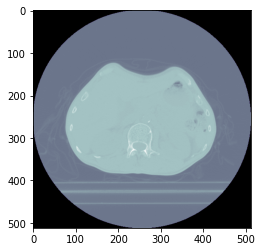

In [14]:
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)

In [ ]:
import os
import subprocess
path = r'/projects/incisive/datalake/colorectal/goc/data/20210910_1123/Test100921/004-000001/Study-CT-20100922-170/Series-2'

cmd = 'hdfs dfs -find {} -name *.dcm'.format(path)

#
#files = subprocess.check_output(cmd, shell=True)
#files_list = [x for x in files.decode('utf-8').split()]
files_list = subprocess.check_output(cmd, shell=True).decode('utf-8').strip().split('\n')
#for path in files:
#  filename = path.split(os.path.sep)[-1].split('.txt')[0]
#  print(path, filename)
type(cmd)
files_list

In [16]:
n=len(path)
N=[]
for i in range(n//10):
    N+=[i*10]
N    

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [17]:
def load_dicom(path):
    dicom=pydicom.dcmread(hdfs.open(path))
    data=dicom.pixel_array
    data=data-np.min(data)
    if np.max(data) != 0:
        data=data/np.max(data)
    data=(data*255).astype(np.uint8)
    return data

In [18]:
from tqdm import tqdm
def load_dicom_line(path):
    t_paths = files_list
    images = []
    for filename in tqdm(np.array(t_paths)[N]):
        data = load_dicom(filename)
        if data.max() == 0:
            continue
        images.append(data)
        
    return images

In [19]:
def create_animation(ims):
    fig=plt.figure(figsize=(7,7))
    plt.axis('off')
    im=plt.imshow(ims[0],cmap="gray")

    def animate_func(i):
        im.set_array(ims[i])
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=1000)

In [20]:
from matplotlib import animation, rc
rc('animation', html='jshtml')
images = load_dicom_line(path)


100%|██████████| 11/11 [00:00<00:00, 29.98it/s]


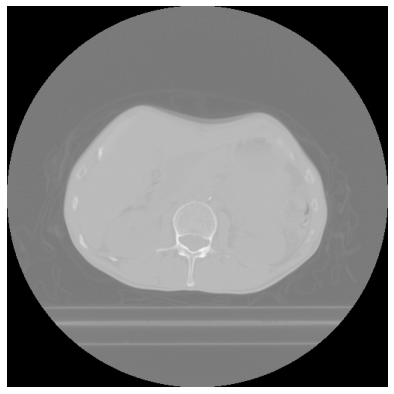

In [21]:
create_animation(images)
